In [1]:
from datetime import datetime
import os
os.environ['MPLCONFIGDIR'] = "/wrk-vakka/users/hajaalin/tmp_mplconfigdir"
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

def read_output_files(dirs):
    files = []
    for d in dirs:
        files.extend(Path(d).glob('*/*.csv'))

    scores_all = []

    for f in files:
        df = pd.read_csv(f)
        df['dir'] = str(Path(f).parent)
        scores_all.append(df)

    return pd.concat(scores_all)


In [2]:
output_dirs = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_8_17_all_20230124',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k2_5_11_all_20230124',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k4_9_17_all_20230124',]
df = read_output_files(output_dirs)
df.head()

,accuracy,precision,recall,f1,repeat,cv,classifier,fset,kernel_size,epochs,job_id,dir
0,0.616438,0.607143,0.850000,0.708333,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,2,273020211,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.521739,0.526316,0.294118,0.377358,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,2,273020211,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.520548,0.532258,0.846154,0.653465,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,2,273020211,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.472973,0.529412,0.225000,0.315789,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,2,273020211,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.402778,0.388889,0.400000,0.394366,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,2,273020211,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [3]:
grp = df.groupby(['kernel_size','fset','epochs'])['accuracy'].agg(['mean','std'])
grp = grp.reset_index(level=2)
grp

epochs      mean       std
kernel_size fset                            
2_5_11      all        2  0.560736  0.084490
            all        4  0.583018  0.073009
            all        6  0.548017  0.078659
            all        8  0.567399  0.061290
            all       10  0.555140  0.062342
...                  ...       ...       ...
4_9_17      all       40  0.566816  0.061612
            all       42  0.564777  0.072125
            all       44  0.565584  0.055948
            all       46  0.564786  0.060771
            all       48  0.567572  0.065781

[72 rows x 3 columns]

In [ ]:

# copy data in a new dataframe, separate feature sets
ddd = pd.DataFrame()

# only k20 was tested until 300 epochs
#fsets = ['f_dxy','f_dxy_angle','f_dxy_angle_morph','f_dxy_angle_area']
fsets = ['all']
for i in range(len(fsets)):
    ddd['epochs_'+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['epochs'].values)
    ddd['mean '+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['mean'].values)
    ddd['std '+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['std'].values)
    
# check that epochs are the same for all feature sets
#test = ~((ddd['epochs_f_dxy'] == ddd['epochs_f_dxy_angle']) & (ddd['epochs_f_dxy_angle'] == ddd['epochs_f_dxy_angle_area']))
#print(ddd[test].shape)
#assert ddd[test].shape[0] == 0

ddd['epochs'] = ddd['epochs_all']
for f in fsets:
    ddd.drop(columns=['epochs_' + f], inplace=True)
#print(ddd.head())

fig = plt.figure()
fig.add_subplot()
ax = fig.axes

#ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)


#style = {'mean fset_f_x':':','std fset_f_x':':','mean fset_f_y':'--','std fset_f_y':'--','mean fset_f_morph':'-','std fset_f_morph':'-',}
#ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,80), ylim=(0,1), figsize=(5,10), style=style, ax=ax[0])
ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,50), ylim=(0.0,.7), figsize=(5,10), ax=ax[0]).legend(loc='lower right')
plot_dir = Path('/proj/hajaalin/Projects/n_track_ML/output/images')
plot_dir.mkdir(exist_ok=True)
ts = datetime.now().strftime('%Y%m%d%H%M')
plt.savefig(plot_dir / ('accuracy_%s.png' % ts))

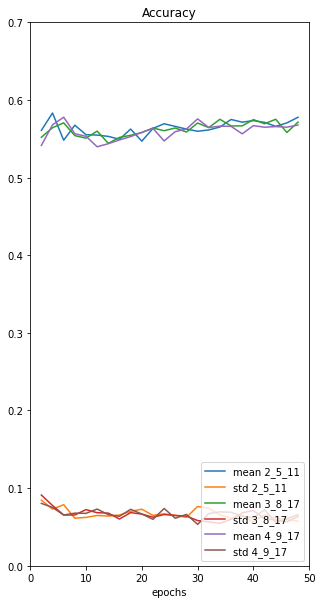

In [5]:

# copy data in a new dataframe, separate kernel sets
ddd = pd.DataFrame()

ksets = ['2_5_11', '3_8_17', '4_9_17']
for i in range(len(ksets)):
    ddd['epochs_'+ksets[i]] = pd.Series(grp.loc[ksets[i],'all']['epochs'].values)
    ddd['mean '+ksets[i]] = pd.Series(grp.loc[ksets[i],'all']['mean'].values)
    ddd['std '+ksets[i]] = pd.Series(grp.loc[ksets[i],'all']['std'].values)
    
# check that epochs are the same for all feature sets
#test = ~((ddd['epochs_f_dxy'] == ddd['epochs_f_dxy_angle']) & (ddd['epochs_f_dxy_angle'] == ddd['epochs_f_dxy_angle_area']))
#print(ddd[test].shape)
#assert ddd[test].shape[0] == 0

ddd['epochs'] = ddd['epochs_2_5_11']
for k in ksets:
    ddd.drop(columns=['epochs_' + k], inplace=True)
#print(ddd.head())

fig = plt.figure()
fig.add_subplot()
ax = fig.axes

#ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)


#style = {'mean fset_f_x':':','std fset_f_x':':','mean fset_f_y':'--','std fset_f_y':'--','mean fset_f_morph':'-','std fset_f_morph':'-',}
#ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,80), ylim=(0,1), figsize=(5,10), style=style, ax=ax[0])
ddd.plot('epochs', title='Accuracy', xlim=(0,50), ylim=(0.0,.7), figsize=(5,10), ax=ax[0]).legend(loc='lower right')
plot_dir = Path('/proj/hajaalin/Projects/n_track_ML/output/images')
plot_dir.mkdir(exist_ok=True)
ts = datetime.now().strftime('%Y%m%d%H%M')
plt.savefig(plot_dir / ('accuracy_%s.png' % ts))